In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 500)

In [2]:
url = '/Users/elizavetazavartseva/Documents/GitHub/labs_EDA_and_Inferential_Stats/lab-eda-univariate/amz_uk_price_prediction_dataset.csv'
amazon_df = pd.read_csv(url)

In [3]:
amazon_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Understanding Product Categories

## Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### 1. Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
### 2. Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [5]:
#Creating a crosstab table for the 'category' column, counting occurrences for each unique value

crosstab_frequency_categories = pd.crosstab(index = amazon_df["category"],    #Make a crosstab
                               columns="count").sort_values(['count'], ascending=False)      #Name the count column and sorting by values
                               

crosstab_frequency_categories

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [6]:
top_5_crosstab_frequency_categories = crosstab_frequency_categories.head(5)
top_5_crosstab_frequency_categories

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: xlabel='category', ylabel='count'>

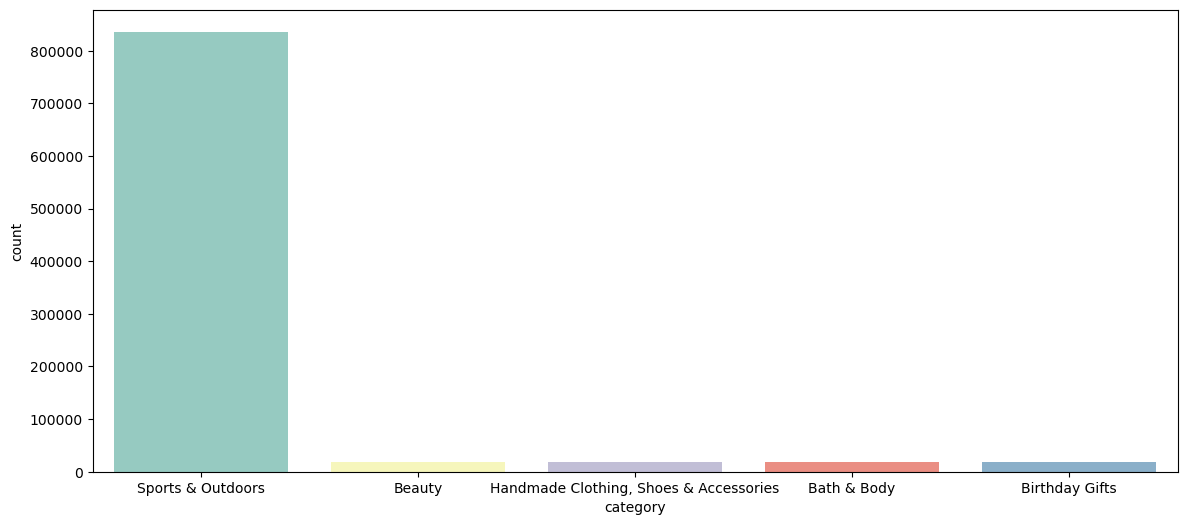

In [8]:
plt.figure(figsize=(14, 6)) #Plot size

# Plotting a bar chart using the 'count', with colors sourced from the "Set3" palette
sns.barplot(x=top_5_crosstab_frequency_categories.index, y=top_5_crosstab_frequency_categories["count"], palette="Set3")

<Axes: ylabel='count'>

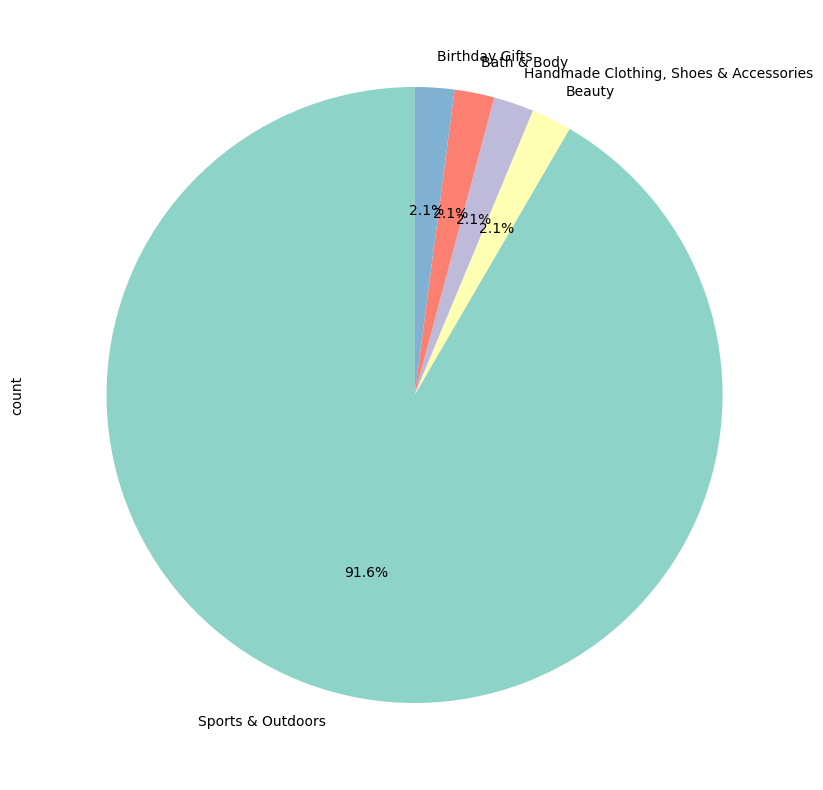

In [9]:
plt.figure(figsize=(12, 10)) #Plot size
# Plotting a pie chart of the 'category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette

amazon_df['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [10]:
# Frequency table for 'category' using value_counts
frequency_categories = amazon_df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_categories = amazon_df['category'].value_counts(normalize=True)

frequency_categories, proportion_categories

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Plugs                                        107
 Alexa Built-In Devices                       107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Motorbike Chassis                         0.000044
 Plugs                   

In [11]:
top_5_frequency_categories = frequency_categories.head(5)

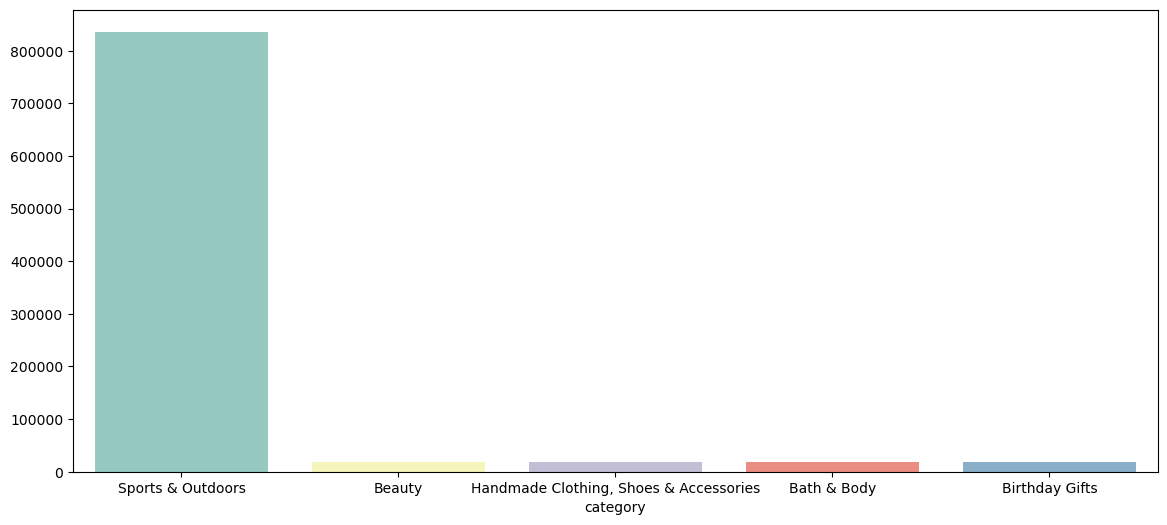

In [12]:
plt.figure(figsize=(14, 6)) #Plot size

# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=top_5_frequency_categories.index, y=top_5_frequency_categories.values, palette="Set3");

# Part 2: Delving into Product Pricing

## Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
### 2. Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
### 3. Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [14]:
mean_price = amazon_df['price'].mean().round(2)
print(f'The Average for price of products is {mean_price}')

median_price = amazon_df['price'].median()
print(f'The Median for price of products is {median_price}')

mode_price = amazon_df['price'].mode()[0]
print(f'The Mode for price of products is {mode_price}')

print(f'''
        This large difference suggests that while many products are priced at ${mode_price},
        there are other products with much higher prices that raise the overall average.
    ''')

The Average for price of products is 89.24
The Median for price of products is 19.09
The Mode for price of products is 9.99

        This large difference suggests that while many products are priced at $9.99,
        there are other products with much higher prices that raise the overall average.
    


In [15]:
amazon_df['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [16]:
variance_price = amazon_df['price'].var()
std_dev_price = amazon_df['price'].std()
min_price = amazon_df['price'].min()
max_price = amazon_df['price'].max()
range_price = max_price - min_price
quantiles_price = amazon_df['price'].quantile([0.25, 0.5, 0.75])


print(f'The variance for price of products is ${variance_price}')
print(f'The standard deviation for price of products is ${std_dev_price}') 
print(f'How much "price" diviate from avg price.')
print(f'The range for price of products is ${range_price}')
print(f'The first quartile for price of products is ${amazon_df["price"].quantile(0.25)}')
print(f'The second quartile for price of products is ${amazon_df["price"].quantile(0.50)}')
print(f'The third quartile for price of products is ${amazon_df["price"].quantile(0.75)}')

print(f'The product prices are highly varied, as indicated by the large variance, high standard deviation, and extensive range.')

The variance for price of products is $119445.48532256528
The standard deviation for price of products is $345.60886175352226
How much "price" diviate from avg price.
The range for price of products is $100000.0
The first quartile for price of products is $9.99
The second quartile for price of products is $19.09
The third quartile for price of products is $45.99
The product prices are highly varied, as indicated by the large variance, high standard deviation, and extensive range.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

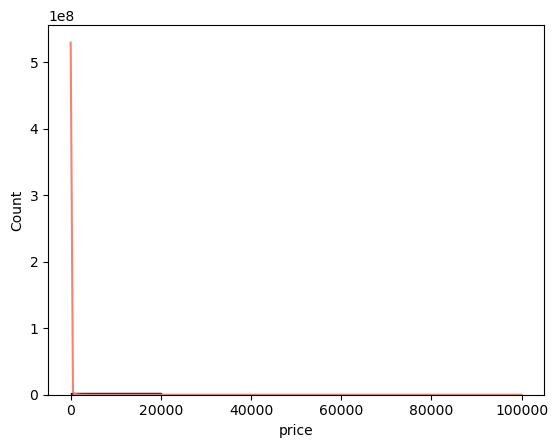

In [17]:
# Plotting a histogram for the 'price' column of the 'amazon_df' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(amazon_df['price'], kde=True, bins=5, color="salmon")

In [18]:
amazon_df['price_quantile'] = pd.qcut(amazon_df['price'], q=4)

amazon_df['price_quantile'].value_counts()

price_quantile
(-0.001, 9.99]       629239
(19.09, 45.99]       612341
(45.99, 100000.0]    609043
(9.99, 19.09]        593028
Name: count, dtype: int64

In [19]:
bins = [0, 10, 20, 40, 200, amazon_df['price'].max()]

amazon_df['new_price_quantile'] = pd.cut(amazon_df['price'], bins=bins, include_lowest=True)

In [20]:
amazon_df['new_price_quantile'] 

0           (20.0, 40.0]
1           (20.0, 40.0]
2           (20.0, 40.0]
3           (20.0, 40.0]
4           (10.0, 20.0]
               ...      
2443646     (20.0, 40.0]
2443647    (40.0, 200.0]
2443648    (40.0, 200.0]
2443649    (40.0, 200.0]
2443650    (40.0, 200.0]
Name: new_price_quantile, Length: 2443651, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 40.0] < (40.0, 200.0] < (200.0, 100000.0]]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


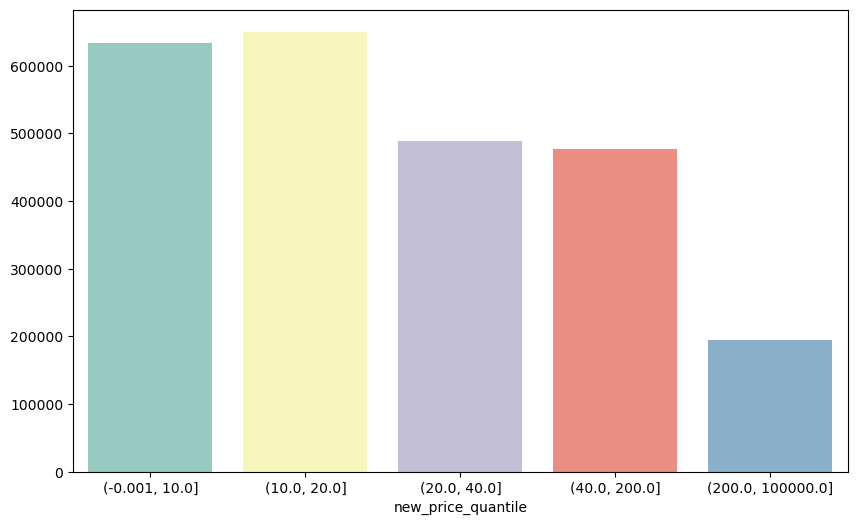

In [21]:
plt.figure(figsize=(10, 6)) #Plot size
sns.barplot(x=amazon_df['new_price_quantile'].value_counts().index, y = amazon_df['new_price_quantile'].value_counts().values, palette="Set3");

<Axes: >

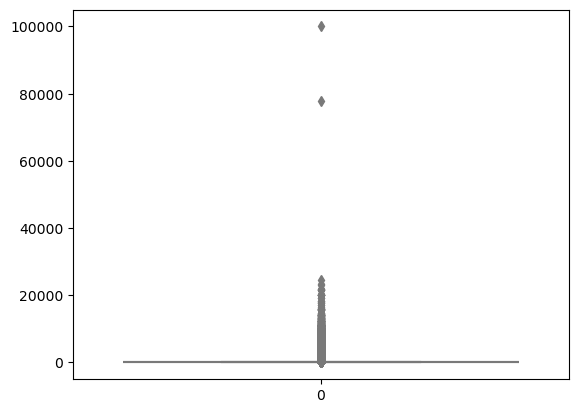

In [22]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(data = amazon_df['price'], color="lightblue")

# Part 3: Unpacking Product Ratings

## Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1. Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
### 2. Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
### 3. Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
### 4. Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [53]:
amazon_df["stars"] = amazon_df["stars"].loc[amazon_df["stars"] != 0]

In [55]:
mean_price = amazon_df['stars'].mean().round(2)
print(f'The Average for rating of products is {mean_price}')

median_price = amazon_df['stars'].median()
print(f'The Median for rating of products is {median_price}')

mode_price = amazon_df['stars'].mode()[0]
print(f'The Mode for rating of products is {mode_price}')

The Average for rating of products is 4.32
The Median for rating of products is 4.4
The Mode for rating of products is 4.5


In [57]:
variance_stars = amazon_df['stars'].var()
std_dev_stars = amazon_df['stars'].std()

quantiles_stars = amazon_df['stars'].quantile([0.25, 0.5, 0.75])

print(f'The variance for stars of products is ${variance_stars}')
print(f'The standard deviation for stars of products is ${std_dev_stars}') 
print(f'How much stars diviate from avg price.')

print(f'The first quartile for stars of products is ${amazon_df["stars"].quantile(0.25)}')
print(f'The second quartile for stars of products is ${amazon_df["stars"].quantile(0.50)}')
print(f'The third quartile for stars of products is ${amazon_df["stars"].quantile(0.75)}')

The variance for stars of products is $0.3083433752380519
The standard deviation for stars of products is $0.5552867504614637
How much stars diviate from avg price.
The first quartile for stars of products is $4.1
The second quartile for stars of products is $4.4
The third quartile for stars of products is $4.6


In [59]:
skewness_stars = amazon_df['stars'].skew()
kurtosis_stars = amazon_df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(-2.379568112212788, 9.78193769066431)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

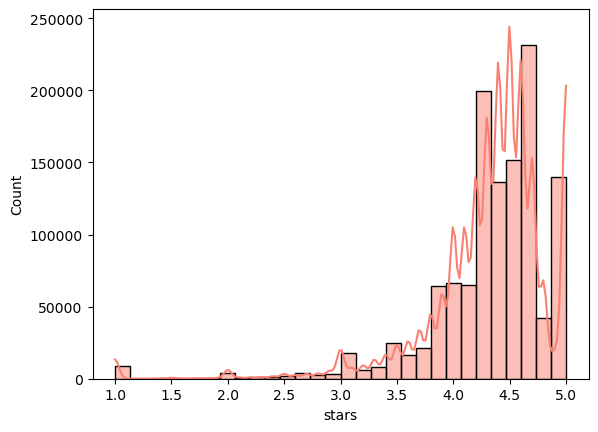

In [61]:
sns.histplot(amazon_df['stars'], kde=True, bins=30, color="salmon")